In [2]:
install.packages('dplyr')
install.packages('tidyverse')
install.packages('caret')
install.packages('BGLR')
install.packages('stringi')
install.packages('Matrix')
install.packages('plyr')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘testthat’, ‘isoband’, ‘dbplyr’, ‘ggplot2’, ‘haven’, ‘hms’, ‘httr’, ‘modelr’, ‘purrr’, ‘reprex’, ‘rvest’, ‘tibble’, ‘xml2’


Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ModelMetrics’, ‘recipes’, ‘pROC’


Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘truncnorm’


Installing package into ‘/home/jupyte

In [1]:
require('plyr')
require("dplyr")
require('BGLR')
require('tidyverse')
require('caret')

Loading required package: plyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BGLR

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ readr   1.3.1
✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ ggplot2 3.3.0     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dpl

In [2]:
setwd('gxe-gee-lmm')

ERROR: Error in setwd("gxe-gee-lmm"): cannot change working directory


In [4]:
getwd()

[1] "/home/jupyter/gxe-gee-lmm"

In [ ]:
## Import Data and Prep for Analysis

In [2]:
# Import CSV files of target data
y_train <- data.frame(read.csv('y_train_scaled.csv'))
y_test <- data.frame(read.csv('y_test_scaled.csv'))
y_holdout <- data.frame(read.csv('y_holdout_scaled.csv'))

In [3]:
y_train <- arrange(y_train, Unique_ID)
y_test <- arrange(y_test, Unique_ID)
y_holdout <- arrange(y_holdout, Unique_ID)

In [4]:
rownames(y_train) = y_train$Unique_ID
rownames(y_test) = y_test$Unique_ID
rownames(y_holdout) = y_holdout$Unique_ID

y_train = subset(y_train, select = -c(Unique_ID))
y_test = subset(y_test, select = -c(Unique_ID))
y_holdout = subset(y_holdout, select = -c(Unique_ID))

In [5]:
print(dim(y_train))
print(dim(y_test))
print(dim(y_holdout))

[1] 122484      1
[1] 21615     1
[1] 25430     1


In [5]:
# Import CSV files of environmental data for CIMMYT and GEE
W_CIMMYT_train <- read.csv('X_train_scaled.csv')
W_CIMMYT_test <- read.csv('X_test_scaled.csv')
W_CIMMYT_holdout <- read.csv('X_holdout_scaled.csv')
#W_gee_train <- read.csv('X_train_gee_scaled.csv')
#W_gee_test <- read.csv('X_test_gee_scaled.csv')

print(dim(W_CIMMYT_train))
print(dim(W_CIMMYT_test))
print(dim(W_CIMMYT_holdout))

# print(dim(W_gee_train))
# print(dim(W_gee_test))

[1] 122484     59
[1] 21615    59
[1] 25430    59


In [6]:
W_CIMMYT_train <- arrange(W_CIMMYT_train, Unique_ID)
W_CIMMYT_test <- arrange(W_CIMMYT_test, Unique_ID)
W_CIMMYT_holdout <- arrange(W_CIMMYT_holdout, Unique_ID)

# W_gee_train <- arrange(W_gee_train, Unique_ID)
# W_gee_test <- arrange(W_gee_test, Unique_ID)

rownames(W_CIMMYT_train) = W_CIMMYT_train$Unique_ID
rownames(W_CIMMYT_test) = W_CIMMYT_test$Unique_ID
rownames(W_CIMMYT_holdout) = W_CIMMYT_holdout$Unique_ID

# rownames(W_gee_train) = W_gee_train$Unique_ID
# rownames(W_gee_test) = W_gee_test$Unique_ID

W_CIMMYT_train <- subset(W_CIMMYT_train, select = -c(Unique_ID))
W_CIMMYT_test <- subset(W_CIMMYT_test, select = -c(Unique_ID))
W_CIMMYT_holdout <- subset(W_CIMMYT_holdout, select = -c(Unique_ID))

# W_gee_train <- subset(W_gee_train, select = -c(Unique_ID))
# W_gee_test <- subset(W_gee_test, select = -c(Unique_ID))

In [11]:
print(dim(W_CIMMYT_train))
print(dim(W_CIMMYT_test))
print(dim(W_CIMMYT_holdout))

[1] 122484     58
[1] 21615    58
[1] 25430    58


In [7]:
# Import pedigree matrix
A <- read.csv('A_matrix_unique.csv', row.names = 1)

In [13]:
dim(A)

[1] 3489 3489

In [8]:
# A matrix doesn't read in well as a CSV, need to repeat some processing steps
# Remove the X prefix from the column names
names(A) <- substring(names(A),2)
A <- A[order(rownames(A)),order(names(A))]
print(colnames(A)[1])
print(rownames(A)[1])

[1] "100507"
[1] "100507"


In [9]:
X_train_GID <- read.csv('X_train_GID.csv')
X_test_GID <- read.csv('X_test_GID.csv')
X_holdout_GID <- read.csv('X_holdout_GID.csv')

In [10]:
X_train_GID <- arrange(X_train_GID, Unique_ID)
X_test_GID <- arrange(X_test_GID, Unique_ID)
X_holdout_GID <- arrange(X_holdout_GID, Unique_ID)


rownames(X_train_GID) = X_train_GID$Unique_ID
rownames(X_test_GID) = X_test_GID$Unique_ID
rownames(X_holdout_GID) = X_holdout_GID$Unique_ID


X_train_GID <- subset(X_train_GID, select = -c(Unique_ID))
X_test_GID <- subset(X_test_GID, select = -c(Unique_ID))
X_holdout_GID <- subset(X_holdout_GID, select = -c(Unique_ID))

## Run Model on Sample of Data

Full dataset is too large, creates a 156Gb matrix and crashes the instance

In [ ]:
# Set Sample Indices
# train_random_sample <- sample(nrow(y_train), size = (nrow(y_train) * 1))
# test_random_sample <- sample(nrow(y_test), size = (nrow(y_test) * 1))

In [ ]:
# Sample Target Data
# y_train_sample <- as.data.frame(y_train[train_random_sample,], row.names = row.names(y_train)[train_random_sample])
# colnames(y_train_sample) <- c('GRAIN_YIELD')
# y_test_sample <- as.data.frame(y_test[test_random_sample,], row.names = row.names(y_test)[test_random_sample])
# colnames(y_test_sample) <- c('GRAIN_YIELD')

# # Sample CIMMYT Environmental Data
# W_CIMMYT_train_sample <- W_CIMMYT_train[train_random_sample,]
# W_CIMMYT_test_sample <- W_CIMMYT_test[test_random_sample,]

# # Sample GEE Environmental Data
# W_gee_train_sample <- W_gee_train[train_random_sample,]
# W_gee_test_sample <- W_gee_test[test_random_sample,]

# # Sample Unique GID List
# X_train_GID_sample <- as.data.frame(X_train_GID[train_random_sample,], row.names = row.names(X_train_GID)[train_random_sample])
# colnames(X_train_GID_sample) <- c('GID')
# X_test_GID_sample <- as.data.frame(X_test_GID[test_random_sample,], row.names = row.names(X_test_GID)[test_random_sample])
# colnames(X_test_GID_sample) <- c('GID')

In [ ]:
# # Combine Train and Test but keep index of separation
# y_sample <- rbind(y_train_sample,y_test_sample)
# W_CIMMYT_sample <- rbind(W_CIMMYT_train_sample, W_CIMMYT_test_sample)
# W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
# X_GID_sample <- rbind(X_train_GID_sample, X_test_GID_sample)
# print(length(y_sample[train_random_sample,]))
# print(length(y_sample[test_random_sample,]))
# print(length(X_GID_sample[train_random_sample,]))
# print(length(X_GID_sample[test_random_sample,]))

In [11]:
# Combine Train and Test but keep index of separation
y_build <- rbind(as.data.frame(y_train),as.data.frame(y_test))
W_CIMMYT_build <- rbind(as.data.frame(W_CIMMYT_train), as.data.frame(W_CIMMYT_test))
# W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
X_GID_build <- rbind(as.data.frame(X_train_GID), as.data.frame(X_test_GID))

In [18]:
print(dim(y_build))
print(dim(W_CIMMYT_build))
print(dim(X_GID_build))

[1] 144099      1
[1] 144099     58
[1] 144099      1


In [13]:
# Combine Build and Holdout but keep index of separation
y_complete <- rbind(as.data.frame(y_build),as.data.frame(y_holdout))
W_CIMMYT_complete <- rbind(as.data.frame(W_CIMMYT_build), as.data.frame(W_CIMMYT_holdout))
# W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
X_GID_complete <- rbind(as.data.frame(X_GID_build), as.data.frame(X_holdout_GID))

In [20]:
print(dim(y_complete))
print(dim(W_CIMMYT_complete))
print(dim(X_GID_complete))

[1] 169529      1
[1] 169529     58
[1] 169529      1


In [14]:
# Add minimum value of each complete data column to the values in that column,
# To ensure that the W matrix is always positive, avoiding issues with later matrix decomposition

W_column_mins = apply(W_CIMMYT_complete,2,min)

In [15]:
W_CIMMYT_complete_pos = sweep(W_CIMMYT_complete,2,W_column_mins,"-")
sum(W_CIMMYT_complete_pos[W_CIMMYT_complete_pos < 0])

[1] 0

In [16]:
#set.seed(123)
#training.samples <- y_sample$GRAIN_YIELD %>%
#  createDataPartition(p = 0.9, list = FALSE)

# Select training data from build set, make test target observations NA so they don't affect the training process 

test_id_pos = y_complete[rownames(y_test),]
train_rows = nrow(y_train)
y_train_na = y_build$GRAIN_YIELD
y_train_na[-seq_len(train_rows)] = NA

In [17]:
# Select build data from complete set, make holdout target observations NA so they don't affect the training process 

holdout_id_pos = y_complete[rownames(y_holdout),]
build_rows = nrow(y_build)
y_build_na = y_complete$GRAIN_YIELD
y_build_na[-seq_len(build_rows)] = NA

## Model 1: Main Variety Effects

In [18]:
# Fitting Model 1 (Main Environment-Line Effects)
# (EL)

# incidence matrix for main eff. of environments.
# ZE = model.matrix(~factor(Y$ENV)-1)     

# incidence matrix for main eff. of lines.
X_GID_complete$GID = factor(x=X_GID_complete$GID,levels=rownames(A),ordered=TRUE)
ZVAR = model.matrix(~X_GID_complete$GID-1)
print(dim(ZVAR))
print(length(y_build_na))

[1] 169529   3489
[1] 169529


In [ ]:
# Model Fitting

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            VAR=list(X=ZVAR,model='BRR'))

ETA = list(VAR=list(X=ZVAR,model='BRR'))

fm1 = BGLR(y=y_build_na,ETA=ETA,saveAt='M1_',nIter=3000,burnIn=1000)

          R2      RMSE       MAE
1 0.02999441 0.9849057 0.7839282


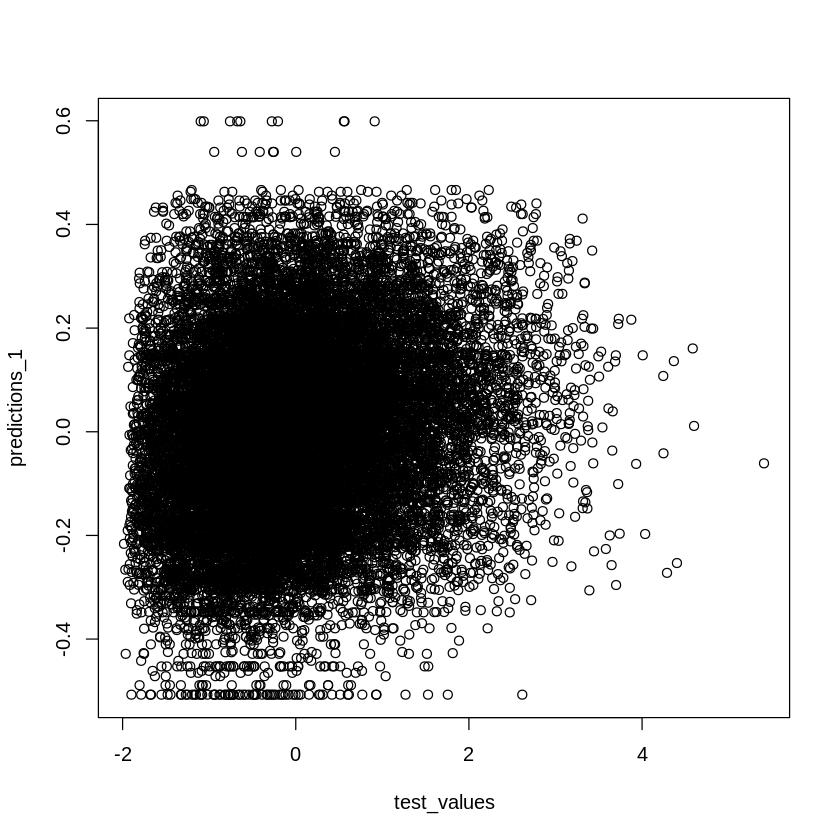

In [43]:
predictions_1 = fm1$yHat[-seq_len(build_rows)]
test_values = y_complete$GRAIN_YIELD[-seq_len(build_rows)]
R2 = R2(predictions_1, test_values)
RMSE = RMSE(predictions_1, test_values)
MAE = MAE(predictions_1, test_values)
model1_scores = data.frame(R2, RMSE, MAE)
print(model1_scores)
plot(test_values,predictions_1)

## Model 2: Main Pedigree Effects 

In [19]:
# Alternative Model 2 with Eigendecomposition
A = as.matrix(A)/mean(diag(as.matrix(A)))
# L_star = eigen(A, symmetric =TRUE)
# Gamma = L_star$vectors
# Lambda = L_star$values 
# Z_star = ZVAR%*%Gamma%*%(Lambda^0.5)

L = t(chol(A))
Z_star = ZVAR%*%L

In [32]:
# Fitting Model 2 with Alternative Z_star (Main Environment-Pedigree Effects)
# (EA)

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            PED=list(X=Z_star,model='BRR'))

ETA = list(PED=list(X=Z_star,model='BRR'))

In [ ]:
fm2 = BGLR(y=y_build_na,ETA=ETA,saveAt='M2_',nIter=2000,burnIn=500)

         R2      RMSE       MAE
1 0.0391452 0.9802682 0.7782821


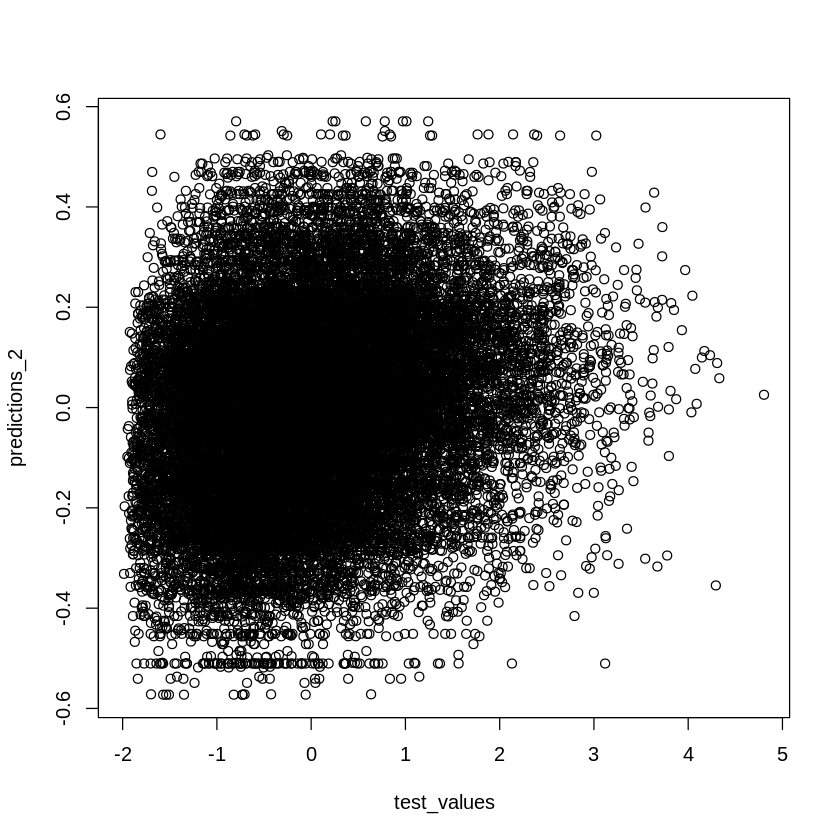

In [35]:
predictions_2 = fm2$yHat[-seq_len(build_rows)]
test_values = y_complete$GRAIN_YIELD[-seq_len(build_rows)]
R2 = R2(predictions_2, test_values)
RMSE = RMSE(predictions_2, test_values)
MAE = MAE(predictions_2, test_values)
model2_scores = data.frame(R2, RMSE, MAE)
print(model2_scores)
plot(test_values,predictions_2)

## Model 3: Just Environment Main Effects

In [20]:
W_CIMMYT_div = W_CIMMYT_complete_pos/sqrt(ncol(W_CIMMYT_complete_pos))

In [28]:
# Model 3 with just EC - CIMMYT
ETA = list(EC=list(X=W_CIMMYT_div,model='FIXED'))

In [ ]:
fm3_ec_CIMMYT = BGLR(y=y_build_na,ETA=ETA,saveAt='M3_',nIter=3000,burnIn=100)

In [36]:
predictions_3_CIMMYT = fm3_ec_CIMMYT$yHat[-seq_len(build_rows)]
test_values = y_complete$GRAIN_YIELD[-seq_len(build_rows)]
R2 = R2(predictions_3_CIMMYT, test_values)
corr = cor(predictions_3_CIMMYT, test_values)
RMSE = RMSE(predictions_3_CIMMYT, test_values)
MAE = MAE(predictions_3_CIMMYT, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
png('LMM_Scatter_CIMMYT_ENV.png')
plot(predictions_3_CIMMYT[predictions_3_CIMMYT<5],test_values[predictions_3_CIMMYT<5],
     ylab="Observed Grain Yield",
    xlab='Predicted Grain Yield', 
     main="LMM with CIMMYT Environment Only",
     cex=0.8,bty="L")
dev.off()

         R2      RMSE       MAE
1 0.1114933 0.9426233 0.7441699


png 
  2

In [ ]:
W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [ ]:
# Model 3 with just EC - GEE
ETA = list(EC=list(X=W_gee_sample_div,model='BRR'))

In [ ]:
fm3_ec_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)

In [ ]:
predictions_3_gee = fm3_ec_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_3_gee, test_values)
corr = cor(predictions_3_gee, test_values)
RMSE = RMSE(predictions_3_gee, test_values)
MAE = MAE(predictions_3_gee, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
plot(test_values,predictions_3_gee)

## Model 4: Main Pedigree and Environment Effects

In [ ]:
# Fitting Model 3_CIMMYT (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

In [21]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_CIMMYT_div,model='FIXED'))

In [ ]:
fm4_CIMMYT = BGLR(y=y_build_na,ETA=ETA,saveAt='M4_CIM_',nIter=2000,burnIn=500)




#--------------------------------------------------------------------#

#        _\\|//_                                                     #

#       (` o-o ')      BGLR v1.0.8                                   #

#------ooO-(_)-Ooo---------------------------------------------------#

#                      Bayesian Generalized Linear Regression        #

#                      Gustavo de los Campos, gdeloscampos@gmail.com #

#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #

#    (   )     (   )   November, 2018                                #

#_____\ (_______) /_________________________________________________ #

#      \_)     (_/                                                   #

#                                                                    #

#------------------------------------------------------------------- #






         R2      RMSE       MAE
1 0.1127482 0.9419506 0.7441302


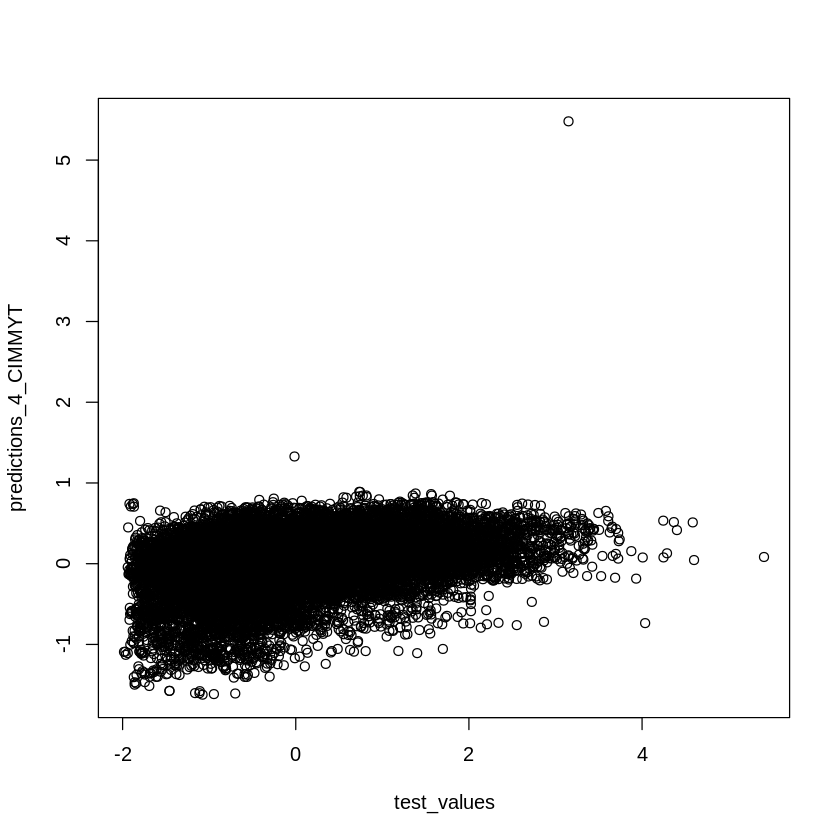

In [22]:
predictions_4_CIMMYT = fm4_CIMMYT$yHat[-seq_len(build_rows)]
test_values = y_complete$GRAIN_YIELD[-seq_len(build_rows)]
R2 = R2(predictions_4_CIMMYT, test_values)
RMSE = RMSE(predictions_4_CIMMYT, test_values)
MAE = MAE(predictions_4_CIMMYT, test_values)
model4_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model4_CIMMYT_scores)
plot(test_values,predictions_4_CIMMYT)

In [ ]:
# Fitting Model 3_GEE (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [1]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_gee_sample_div,model='BRR'))

ERROR: Error in eval(expr, envir, enclos): object 'Z_star' not found


In [ ]:
fm4_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)


In [ ]:
predictions_4_gee = fm4_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_4_gee, test_values)
RMSE = RMSE(predictions_4_gee, test_values)
MAE = MAE(predictions_4_gee, test_values)
model4_gee_scores = data.frame(R2, RMSE, MAE)
print(model4_gee_scores)
plot(test_values,predictions_4_gee)

## Model 5: Main Pedigree, Main Environment, and Interaction Effects

In [21]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) CIMMYT

# Results in vector of size 157.4 Gb, need sufficient RAM to hold

ZAZ = tcrossprod(Z_star)

In [22]:
ZAZ[1:5]

[1] 1.053802805 0.001230304 0.024588446 0.024588446 0.077247734

In [23]:
W_matrix = as.matrix(W_CIMMYT_div)
WW = tcrossprod(W_matrix)

In [25]:
K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))

In [26]:
K[K<=0] <- 0.0001

In [27]:
L2 = t(chol(K))


ERROR: Error in chol.default(K): the leading minor of order 4673 is not positive definite


In [ ]:

L_5_star = eigen(K, symmetric =TRUE)
Gamma_5 = L_5_star$vectors
Lambda_5 = L_5_star$values 
L2 = Gamma_5%*%(Lambda_5^0.5)

In [28]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='FIXED'),
           # AxW=list(V=L_5_star$vectors,d=L_5_star$values, model='RKHS'))
           AxW=list(X=L2,model='BRR'))

ERROR: Error in eval(expr, envir, enclos): object 'L2' not found


In [ ]:
fm5_CIMMYT = BGLR(y=y_train_na,ETA=ETA, saveAt='M5_',nIter=2000,burnIn=500)

In [ ]:
predictions_5_CIMMYT = fm5_CIMMYT$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
corr = cor(predictions_5_CIMMYT, test_values)
R2 = R2(predictions_5_CIMMYT, test_values)
RMSE = RMSE(predictions_5_CIMMYT, test_values)
MAE = MAE(predictions_5_CIMMYT, test_values)
model5_CIMMYT_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_CIMMYT_scores)
png('LMM_Scatter_CIMMYT_ENV.png')
plot(predictions_5_CIMMYT[predictions_5_CIMMYT<5],test_values[predictions_5_CIMMYT<5],
     ylab="Observed Grain Yield",
    xlab='Predicted Grain Yield', 
     main="LMM with CIMMYT Genotype Environment Interactions",
     cex=0.8,bty="L")
dev.off()

In [ ]:
remove(L2, W_matrix, K, WW)
# Garbage Collector to Clear up RAM
gc()

In [ ]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) GEE

# ZAZ = tcrossprod(Z_star) # Already run above

W_matrix = as.matrix(W_gee_sample_div)

WW = tcrossprod(W_matrix)

K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [ ]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='BRR'),
           AxW=list(X=L2,model='BRR'))

In [ ]:
fm5_gee = BGLR(y=y_train_na,ETA=ETA, saveAt='M4_',nIter=500,burnIn=200)

In [ ]:
predictions_5_GEE = fm5_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_5_GEE, test_values)
corr = cor(predictions_5_GEE, test_values)
RMSE = RMSE(predictions_5_GEE, test_values)
MAE = MAE(predictions_5_GEE, test_values)
model5_GEE_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_GEE_scores)
plot(test_values,predictions_5_GEE)